In [1]:
import posydon
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
os.environ['MSG_DIR'] = '/home/kasdaglie/blue/kasdaglie/msg-1.2'
import matplotlib.patches as mpatches
from population_spectra import population_spectra
from generate_cmds import population_cmd
from spectral_tools import population_data
%matplotlib inline
plt.rcParams.update({'font.size': 16})
import astropy.constants as con
import astropy.units as unt
kpc = 3.08e19*unt.m


ModuleNotFoundError: No module named 'generate_spectra'

In [2]:
colums = {'binary_number':[],'S1_mass':[],'S2_mass':[],'S1_R':[],'S2_R':[],'S1_L':[],'S2_L':[],'Z/Zo':[]}
df = pd.DataFrame(colums)
print(df)

Empty DataFrame
Columns: [binary_number, S1_mass, S2_mass, S1_R, S2_R, S1_L, S2_L, Z/Zo]
Index: []


In [3]:
from spectral_tools import load_posydon_population
print(load_posydon_population("/home/kasdaglie/blue/kasdaglie/POSYDON_TRIAL/pop.h5"))

                  S1_state    S1_mass               S2_state   S2_mass
0    H-rich_Core_H_burning   6.983617  H-rich_Core_H_burning  5.248247
1    H-rich_Core_H_burning   7.819426  H-rich_Core_H_burning  4.323057
2    H-rich_Core_H_burning   7.820078  H-rich_Core_H_burning  7.744677
3    H-rich_Core_H_burning   7.806757  H-rich_Core_H_burning  0.786083
4    H-rich_Core_H_burning   7.809711  H-rich_Core_H_burning  3.144157
..                     ...        ...                    ...       ...
105  H-rich_Core_H_burning   9.651722  H-rich_Core_H_burning  5.449924
106  H-rich_Core_H_burning   9.649678  H-rich_Core_H_burning  7.410211
107  H-rich_Core_H_burning   6.983429  H-rich_Core_H_burning  6.914715
108  H-rich_Core_H_burning   7.815979  H-rich_Core_H_burning  1.572161
109                     BH  12.845690                     BH  8.636948

[110 rows x 4 columns]


In [4]:
file = "/home/kasdaglie/blue/kasdaglie/POSYDON_TRIAL/pop.h5"
pop_kwargs = dict( 
    time = 1.0e8,
    metallicity = 1.0,
    scaling_factor = 1*kpc
)
pop = population_spectra(file,**pop_kwargs)

25110000.0
Total time is:  0:00:00.038010


In [3]:
st = datetime.datetime.now()
spectra , lam_c =  pop.create_spectrum_population()
et = datetime.datetime.now()
elapsed_time = et - st 
print('Execution time: ', elapsed_time, 'seconds')


Execution time:  0:00:03.564411 seconds


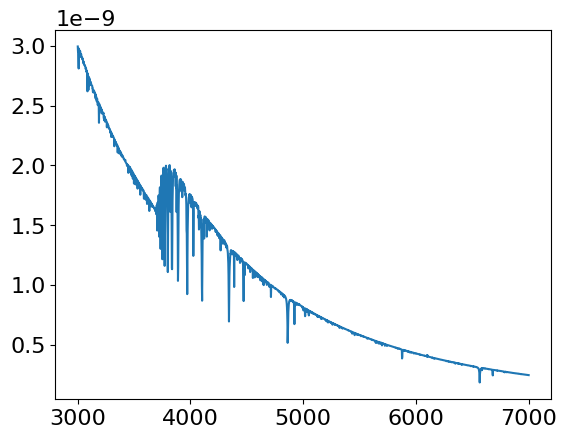

In [4]:
plt.plot(lam_c,spectra)

In [5]:
x = {'Teff':20000 ,'log(g)': 4.1,'[Fe/H]': 0,'Z/Zo':1}
pop.grids.photogrid_flux('secondary_grid',10e-9,**x)

{'U': 1644290389.957219, 'B': 688035373.8568047, 'V': 575954465.0107982}

In [6]:
cmd = population_cmd(file,**pop_kwargs)

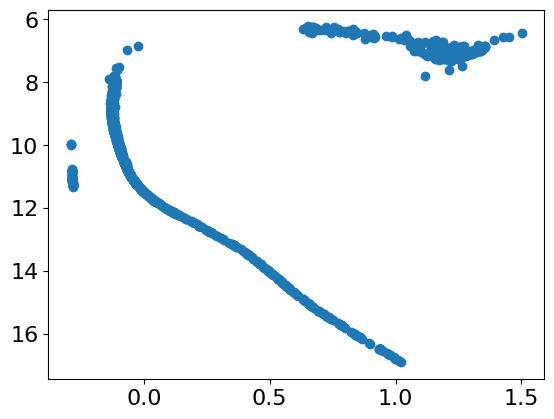

In [7]:
B_V,V,L = cmd.population_mag(3000)
plt.gca().invert_yaxis()
plt.scatter(B_V,V)

In [ ]:
pop.create_population_spectrum()